<a href="https://colab.research.google.com/github/hekmat-ashqer/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

by Hikmat Ashqar

# Project Overview


The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


# Project 1 - Parts 1 & 2


For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!



**Part** 2:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Data Dictionary

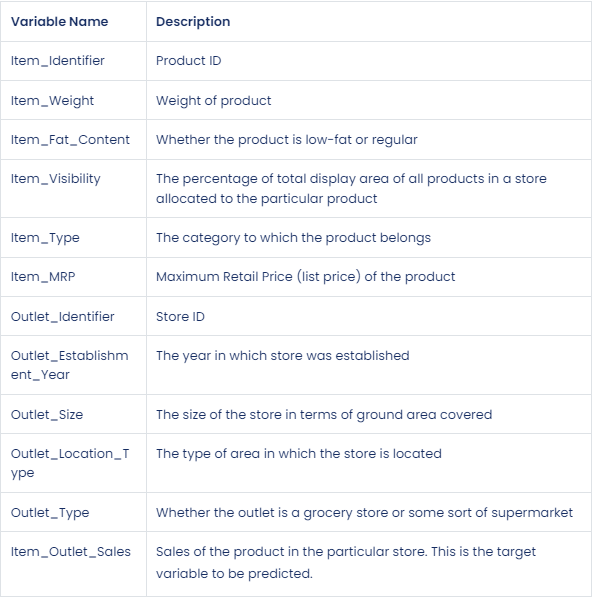

### Imports

In [ ]:
# Import required packages


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




## Load and Inspect Data


In [ ]:
# Save the filepath and load the data as "df_sales"


path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
df2 = df.copy()

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


How many rows/columns:



In [ ]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns

Checking the data types:





In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 - the Outlet_Identifier is showing as an object type column and should be either a float64 or an int64 type column as it is store id in the dictionary .

 - All other data types are as they should be.

### Duplicated Data


Checking for duplicated data:



In [ ]:
df.duplicated().sum()

0

### Missing Values

Checking for missing values:




In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- There are 1463 missing values in the Item_Weight column.
- There are 2410 missing values in the Outlet_Size column.

In order to make informed decisions about how to handle missing data, we will do some additional EDA.

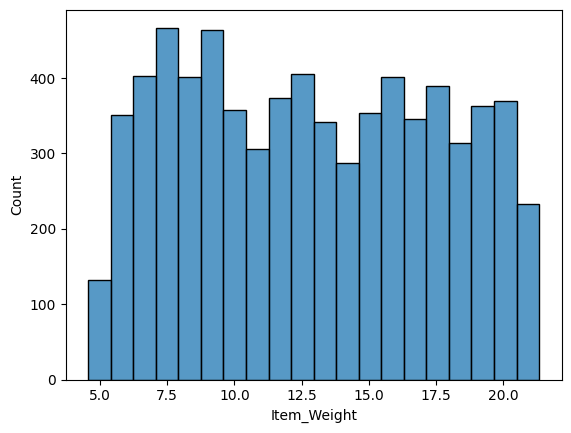

In [ ]:
ax = sns.histplot(data = df, x = 'Item_Weight')


giving that data is normally distributed  we can  use the median or mean to Fill the empty values and we will use the mean as it is a measure of central tendency as there is no sparks and we want to keep using it so it will not be affected after filling empty data.


In [ ]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
#df['Item_Weight'].describe()


In [ ]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

fill in the missing values with the word Unknown so that the values will be filled in, but we will still be aware that those values are unknown

In [ ]:
#df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
#df['Outlet_Size'].value_counts()


Checking to make sure there is no more  empty values

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Inspecting Categorical Columns & Addressing Inconsistent Values

We will now use a filter to create a for loop that loops through all of the object type columns so that we can inspect them further.


In [ ]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column

LF should be Low Fat

low fat should be Low Fat

reg should be Regular

In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 50)
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
Item_Fat_Content_map = {'LF':'Low Fat',
                        'low fat':'Low Fat',
                        'reg':'Regular'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(Item_Fat_Content_map)
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Fixing Data Types

 regarding Outlet_Identifier as it represent store ID it should be integer type and we can remove the OUT prefix

In [ ]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].str.replace('OUT', '')
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype(int)
df['Outlet_Identifier']

0       49
1       18
2       49
3       10
4       13
        ..
8518    13
8519    45
8520    35
8521    18
8522    46
Name: Outlet_Identifier, Length: 8523, dtype: int64

**checking numerical data type**

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
for col in num_cols:
    print(f'- {col}:')
    print(df[col].describe())
    print("\n\n")

- Item_Weight:
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64



- Item_Visibility:
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64



- Item_MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64



- Outlet_Identifier:
count    8523.000000
mean       29.108765
std        13.927648
min        10.000000
25%        17.000000
50%        27.000000
75%        45.000000
max        49.000000
Name: Outlet_Identifier, dtype: float64



- Outlet_Establishment_Year:
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.

In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,29.11,1997.83,2181.29
std,4.64,0.05,62.28,13.93,8.37,1706.50
min,4.56,0.00,31.29,10.00,1985.00,33.29
25%,8.77,0.03,93.83,17.00,1987.00,834.25
50%,12.60,0.05,143.01,27.00,1999.00,1794.33
75%,16.85,0.09,185.64,45.00,2004.00,3101.30
max,21.35,0.33,266.89,49.00,2009.00,13086.96


just to make sure item outlet sales is correct as it has maximum value of 13086 will see the distribution

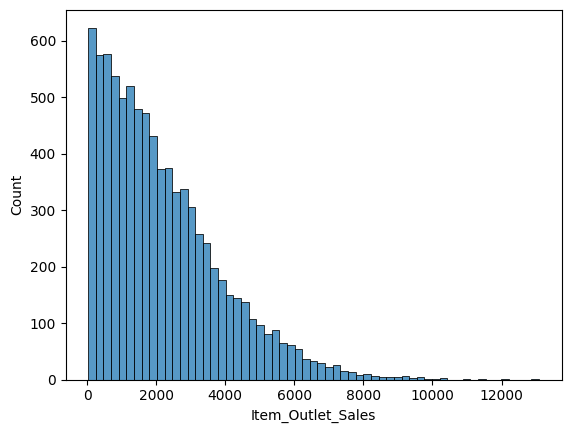

In [ ]:
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')


### Summary Statistics for Numeric Features

In [ ]:
stats =  df.describe()
stats.loc[['min','max','mean']]


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,10.000000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,49.000000,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,29.108765,1997.831867,2181.288914


seems everything looks good with numerics data  statistics

# Project - part 3

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

Histograms to view the distributions of numerical features in your dataset.
Boxplots to view statistical summaries of numerical features in your dataset.
Countplots to view the frequency of each class of categorial features in your dataset.
Heatmap to view the correlation between features.
Start updating the README file associated with the project.

Add text describing the project.
Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.
Please feel free to add more than the minimum. Remember, this is your chance to display your skills!​

## Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


### Histograms to view the distributions of numerical features in our dataset.


define all dictionary data as a list to show more informative chart title

In [ ]:
# Identify dictionary data
dictionary_descriptions = {
    "Item_Identifier": "Product ID",
    "Item_Weight": "Weight of product",
    "Item_Fat_Content": "product is low-fat or regular",
    "Item_Visibility": "product display area  percentage",
    "Item_Type": "product category",
    "Item_MRP": "Maximum Retail Price",
    "Outlet_Identifier": "Store ID",
    "Outlet_Establishment_Year": "store Establishment year",
    "Outlet_Size": "store size (ground area covered)",
    "Outlet_Location_Type": "type of area of the store location",
    "Outlet_Type": "grocery store or supermarket",
    "Item_Outlet_Sales": "Sales of the product (target variable)"
}


In [ ]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


 Distribution of Weight of product  



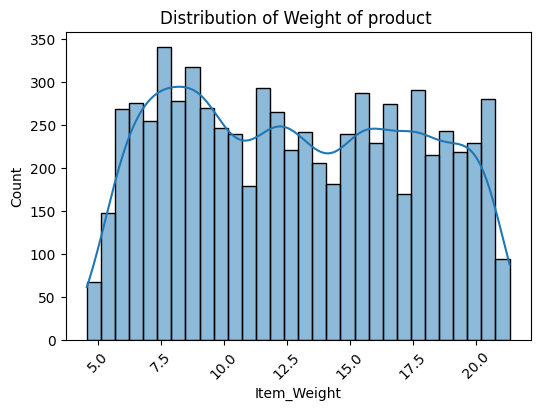


 Distribution of product display area  percentage  



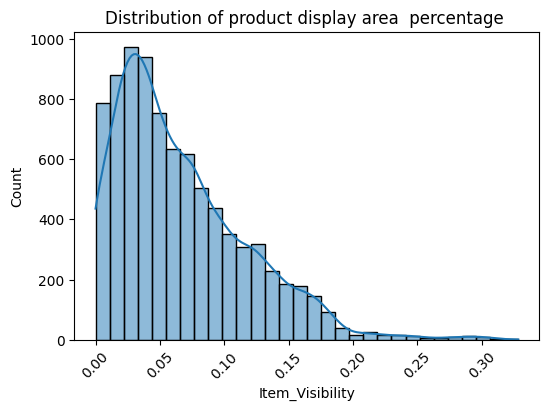


 Distribution of Maximum Retail Price  



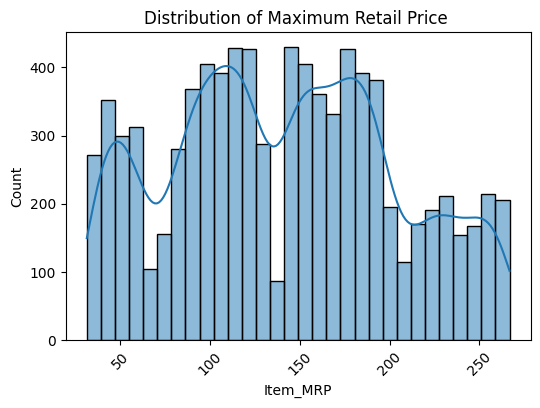


 Distribution of Store ID  



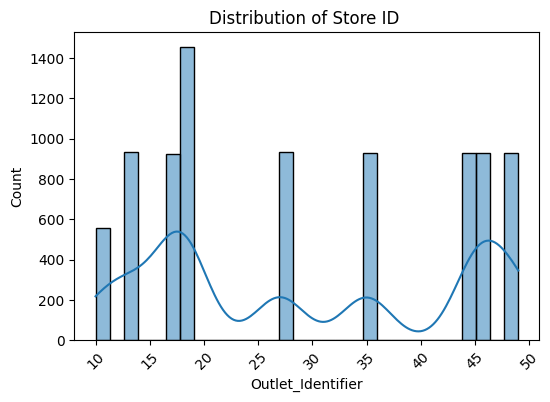


 Distribution of store Establishment year  



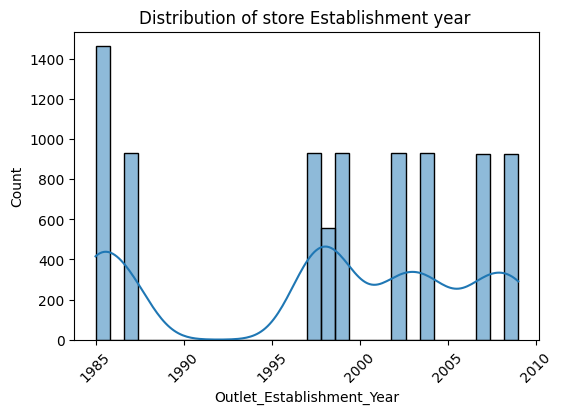


 Distribution of Sales of the product (target variable)  



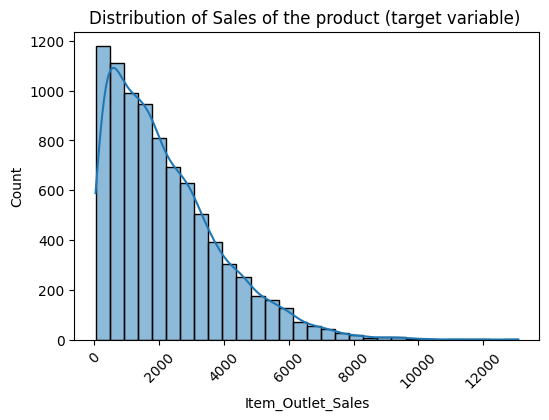

In [ ]:

# Loop through numerical columns and plot histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=col, kde=True , bins=30)
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Distribution of {dictionary_descriptions[col]} ')
    ax.set_ylabel('Count')
    print(f'\n Distribution of {dictionary_descriptions[col]}  \n')
    plt.show()  # Display the plot

### Boxplots to view statistical summaries of numerical features in your dataset.



 statistical summaries Weight of product  



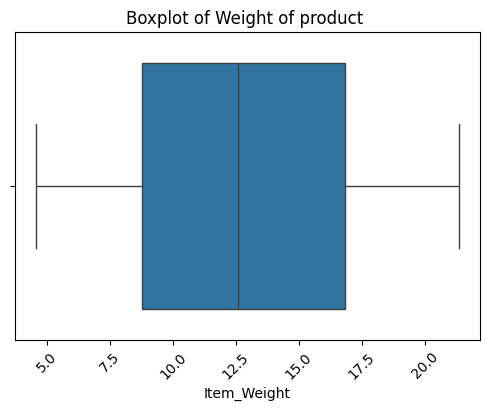


 statistical summaries product display area  percentage  



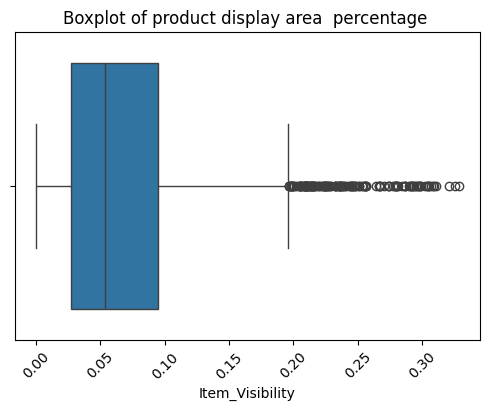


 statistical summaries Maximum Retail Price  



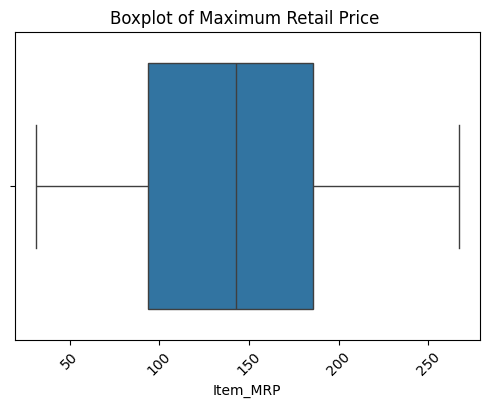


 statistical summaries Store ID  



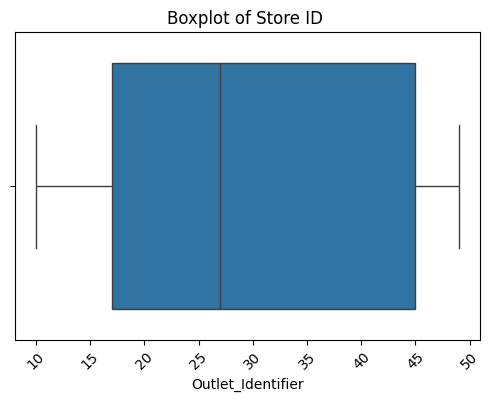


 statistical summaries store Establishment year  



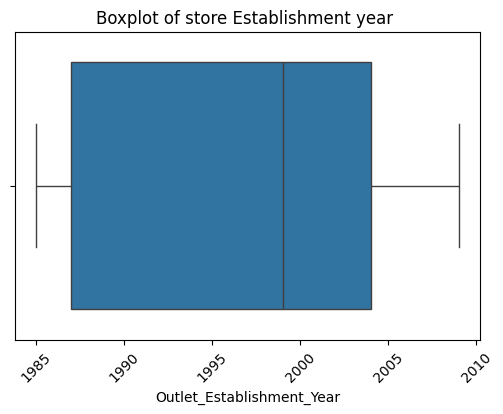


 statistical summaries Sales of the product (target variable)  



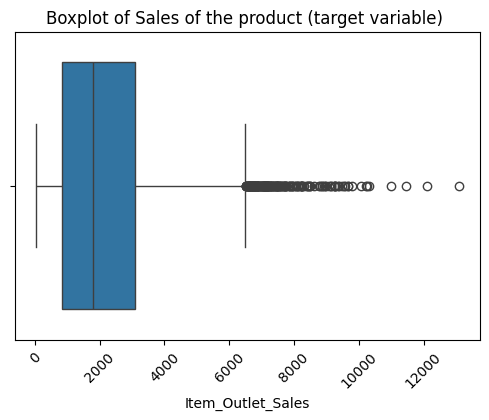

In [ ]:

# Loop through numerical columns and plot histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(data=df, x=df[col])  # Plot histogram with percentages
    ax.ticklabel_format(style='plain', axis='x')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Boxplot of {dictionary_descriptions[col]} ')
    print(f'\n statistical summaries {dictionary_descriptions[col]}  \n')
    plt.show()  # Display the plot



### Countplots to view the frequency of each class of categorial features in your dataset.

In [ ]:
# Identify numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.difference({'Item_Identifier', 'Outlet_Identifier'})
categorical_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')


 countplot of product is low-fat or regular  



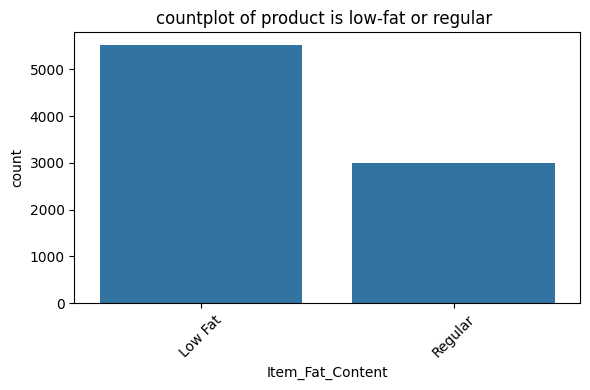


 countplot of product category  



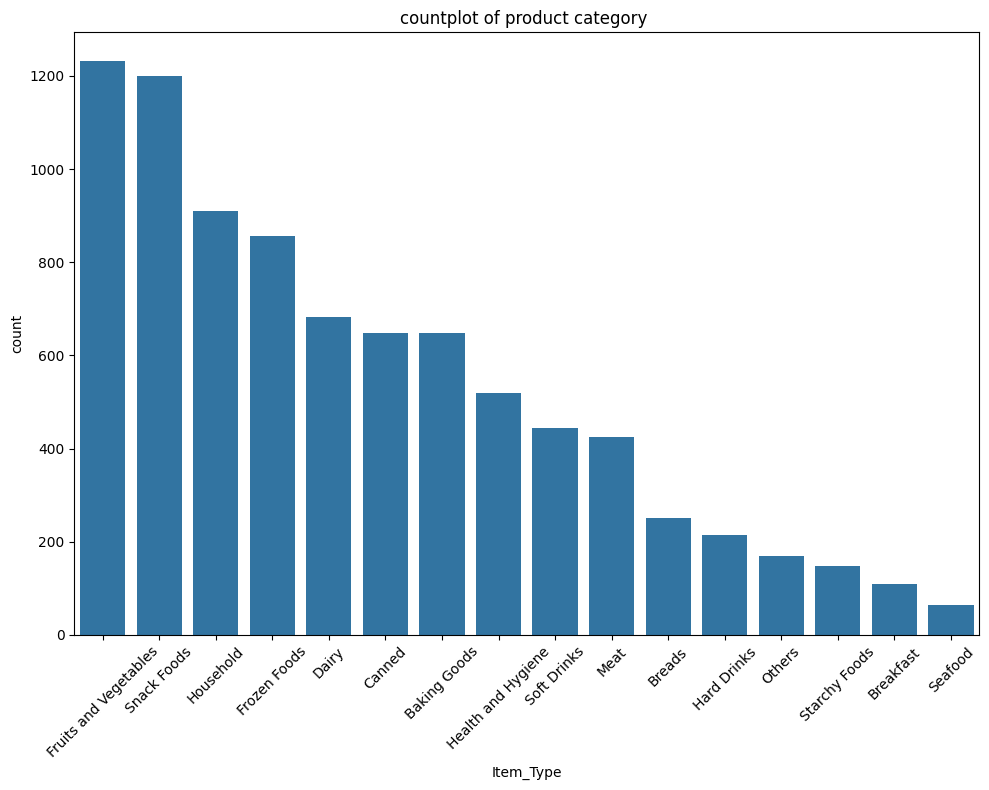


 countplot of type of area of the store location  



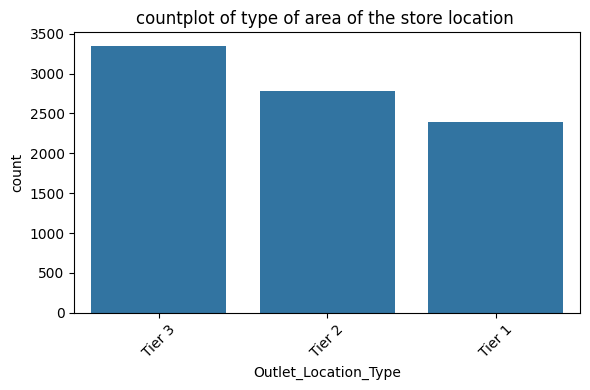


 countplot of store size (ground area covered)  



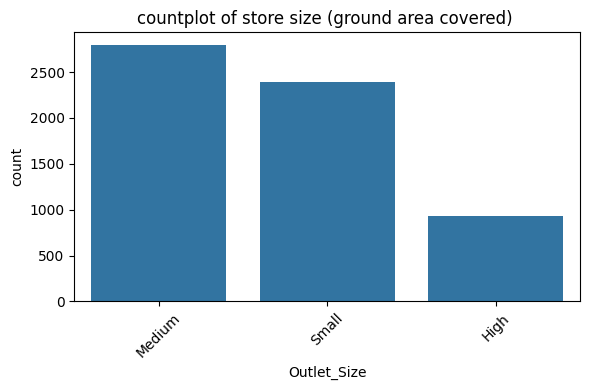


 countplot of grocery store or supermarket  



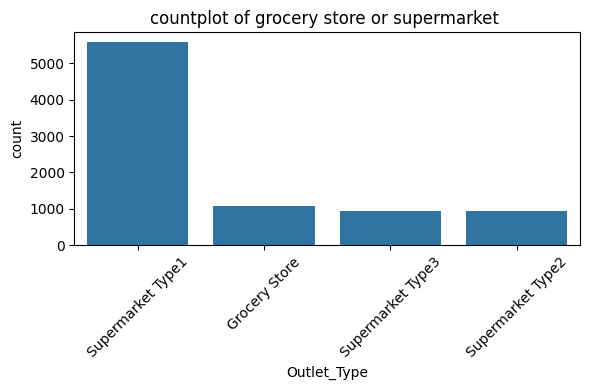

In [ ]:
# Loop through numerical columns and plot histograms
for col in categorical_columns:
  if col=='Item_Type':
    plt.figure(figsize=(10, 8))  # Increase figure size just for Item_Type chart
  else:
    plt.figure(figsize=(6, 4))
  ax = sns.countplot(x=df[col], order = df[col].value_counts().index)
  ax.tick_params(axis='x', rotation=45)
  ax.set_title(f'countplot of {dictionary_descriptions[col]} ')
  print(f'\n countplot of {dictionary_descriptions[col]}  \n')
  plt.tight_layout()  # Adjust layout to fit labels
  plt.show()  # Display the plot

### Heatmap to view the correlation between features.


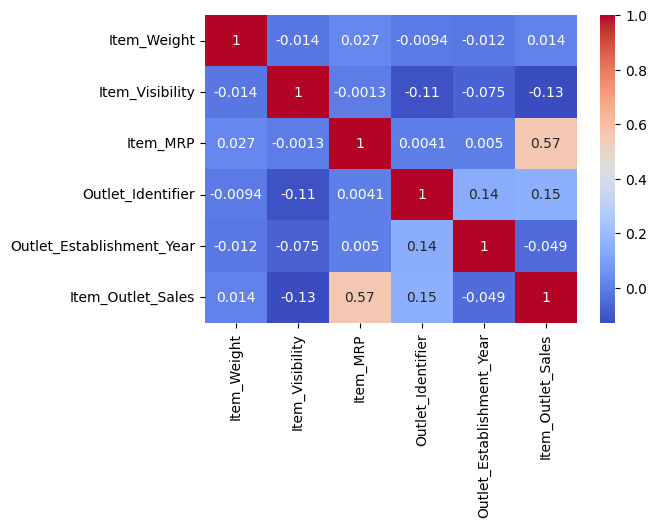

In [ ]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

# Project 1 - part 4

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​

For each feature:

Add a new markdown header.
Paste the feature's definition from the data dictionary into a markdown cell.
Create a univariate visualization showing the distribution of values/categories.
You may use the EDA functions from the previous lessons or create your own visualizations.
Answer the following questions from the Feature Inspection lesson in a markdown cell:
What type of feature is it? (Categorical (nominal), ordinal, numeric)
How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)?
Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?
Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​
Answer the following questions from the Feature Inspection lesson in a Markdown cell:
Based on your business understanding, would you expect this feature to be a predictor of the target?
Does this feature appear to be a predictor of the target?

## Feature Inspection


#### code snippet for functions plotting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")



def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax



### data inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


### inspecting Item_Weight

Item_Weight: Weight of product

#### univariate visualization showing the distribution of values/categories

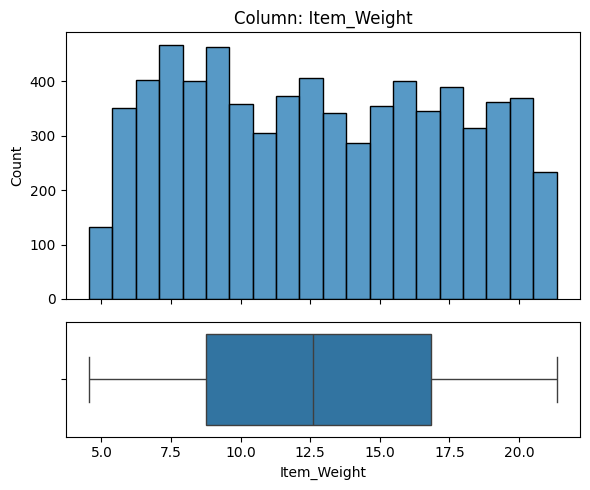

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)


In [ ]:
explore_numeric(df,x='Item_Weight')

- What type of feature is it?  `numeric`
- How many null values? `1463 ` What percentage?`17.17%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` as there is no correlation with target value we may impute with mean as there is no much outlayers from above chart and the distribution is normal `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item wight can be measured before predicting`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

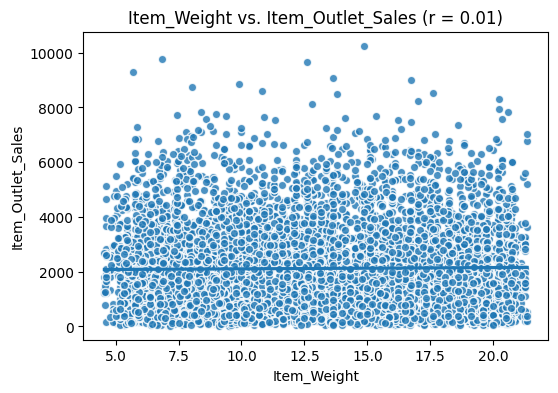

In [ ]:
plot_numeric_vs_target(df, x='Item_Weight', y='Item_Outlet_Sales', figsize=(6,4));

-Based on your business understanding, would you expect this feature to be a predictor of the target?`No i think  Weight does not affect the sales of a product  `
-Does this feature appear to be a predictor of the target?`No , there is no correlation at all just as we excpected `

### inspecting Item_Fat_Content

Item_Fat_Content :	Whether the product is low-fat or regular


#### univariate visualization showing the distribution of values/categories

<ipython-input-35-b402481b9b3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


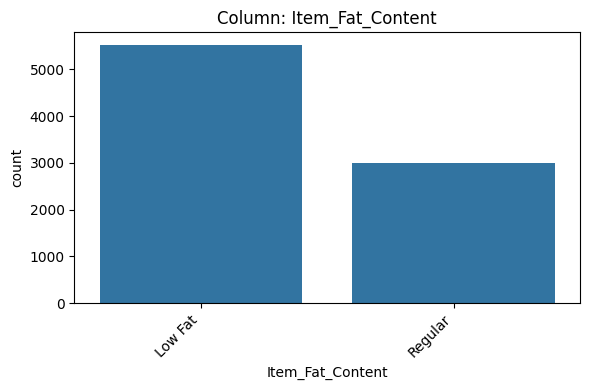

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,x='Item_Fat_Content', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal)`
- How many null values? `zero `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no cardinality is just 2 values `
-Would we know this feature before the target is determined?`yes each item fat content can be measured`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

<ipython-input-35-b402481b9b3a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


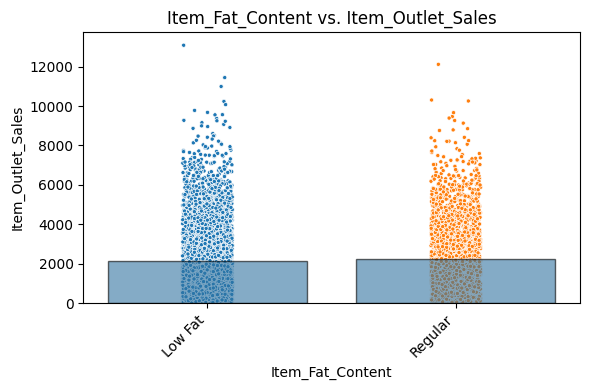

In [ ]:
plot_categorical_vs_target(df, x='Item_Fat_Content', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think  low fat product would have mush less sales than regular maybe due to high price`
- Does this feature appear to be a predictor of the target?`stangely No , seems this feature has no effect at night the price nor the sales `

to confirm our hypothesis just ckecking the price also

In [ ]:
df.groupby('Item_Fat_Content')['Item_MRP'].mean()

Item_Fat_Content
Low Fat    140.714098
Regular    141.504259
Name: Item_MRP, dtype: float64

### inspecting Item_Visibility

Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product


#### univariate visualization showing the distribution of values/categories

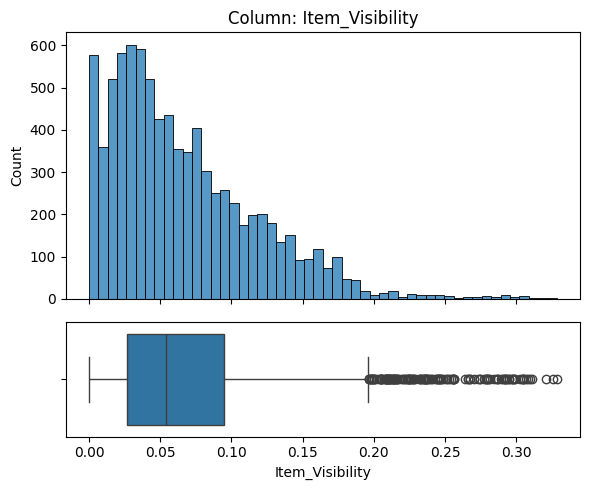

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)


In [ ]:
explore_numeric(df,x='Item_Visibility')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value but we need to make sure if the zeros values `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

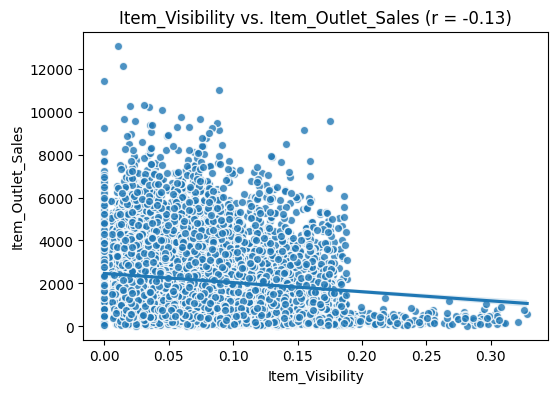

In [ ]:
plot_numeric_vs_target(df, x='Item_Visibility', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes should be more visibility more sales  `
- Does this feature appear to be a predictor of the target?`No , in face there is small negative correlation seems no connection  `

### inspecting Item_Type

Item_Type	The category to which the product belongs


#### univariate visualization showing the distribution of values/categories

<ipython-input-35-b402481b9b3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


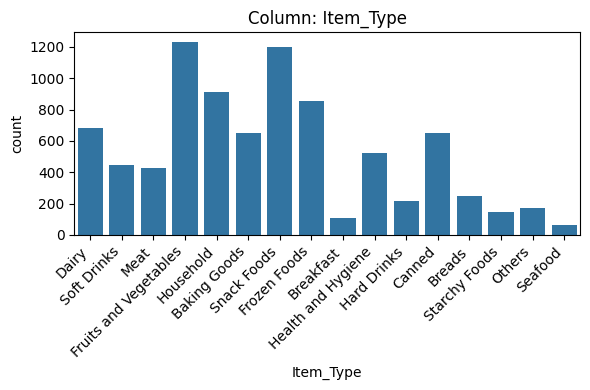

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,x='Item_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal)`
- How many null values? `zero `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`yes it is high we have 16 unique values `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor , but we may need to find a way to put them into groups to decrese cardinality`


####  multivariate visualization plotting feature vs. the target

<ipython-input-35-b402481b9b3a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


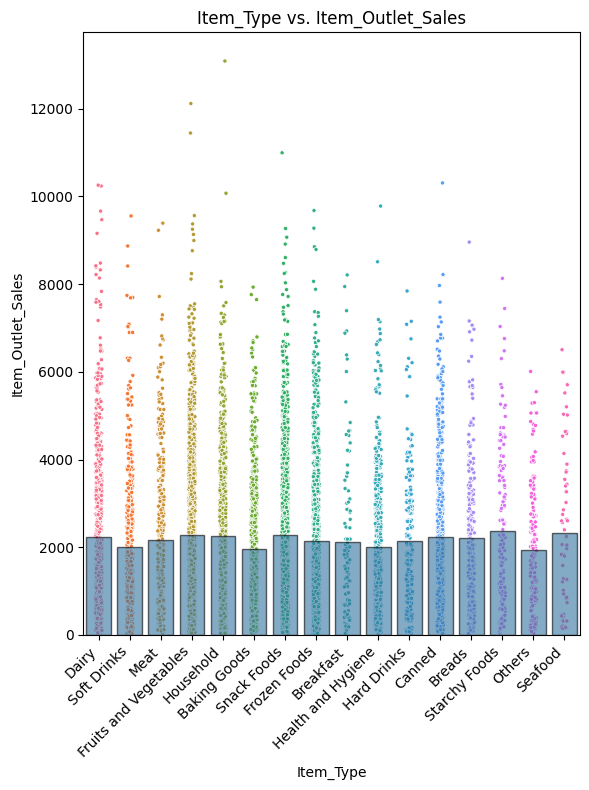

In [ ]:
plot_categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think item type may help us categorize the item based on sales `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean  `

### inspecting Item_MRP

Item_MRP:	Maximum Retail Price (list price) of the product


#### univariate visualization showing the distribution of values/categories

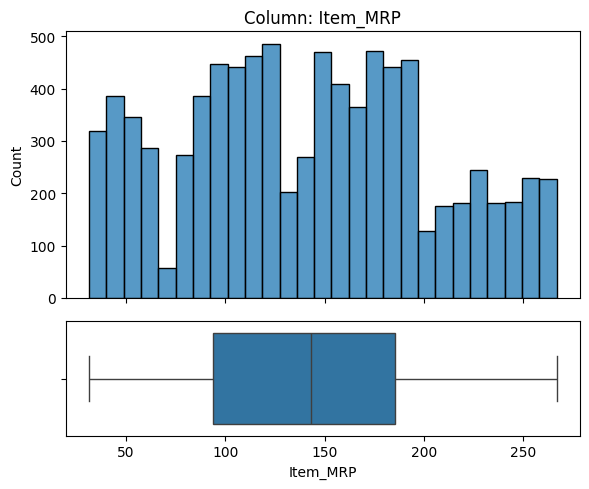

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)


In [ ]:
explore_numeric(df,x='Item_MRP')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`no`


####  multivariate visualization plotting feature vs. the target

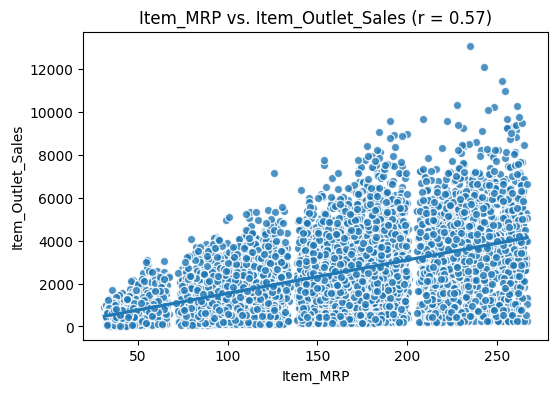

In [ ]:
plot_numeric_vs_target(df, x='Item_MRP', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes maybe negative correlation   `
- Does this feature appear to be a predictor of the target?`yes  , in fact  there is strong positive correlation   `

### belwo two feature should be dropped as there is no relation or affect with target feature and can't be controlled by store owner if any action needed to increase some product sales

#### inspecting Outlet_Identifier

Outlet_Identifier	Store ID


##### univariate visualization showing the distribution of values/categories

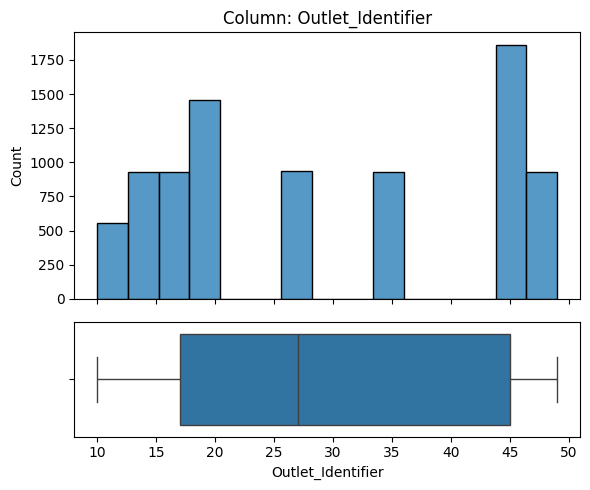

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '27' occurs 935 times (10.97%)


In [ ]:
explore_numeric(df,x='Outlet_Identifier')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes  `

- Is there a business case/understanding reason to exclude based on our business case?`yes no need for this feature `


#####  multivariate visualization plotting feature vs. the target

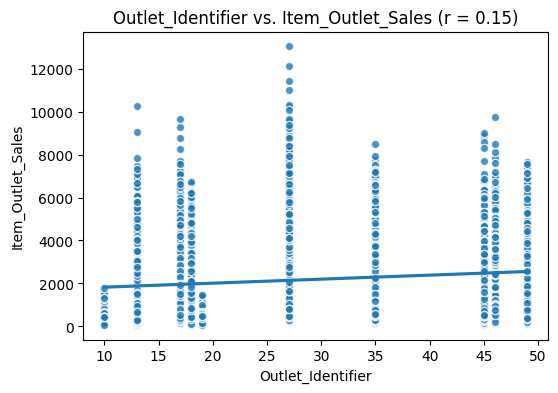

In [ ]:
plot_numeric_vs_target(df, x='Outlet_Identifier', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`no `
- Does this feature appear to be a predictor of the target?`no , this feature should be dropped   `

#### inspecting Outlet_Establishment_Year

Outlet_Establishment_Year:	The year in which store was established


##### univariate visualization showing the distribution of values/categories

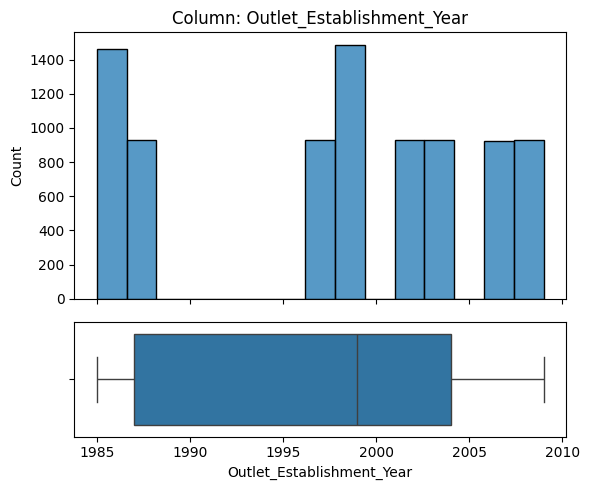

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)


In [ ]:
explore_numeric(df,x='Outlet_Establishment_Year')

- What type of feature is it?  `numeric`
- How many null values? `none` What percentage?`0%` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)` no null value  `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`not categorical feature `
-Would we know this feature before the target is determined?`yes each item can be controlled by the stores`

- Is there a business case/understanding reason to exclude based on our business case?`yes these feature has no effect at the product sales `


#####  multivariate visualization plotting feature vs. the target

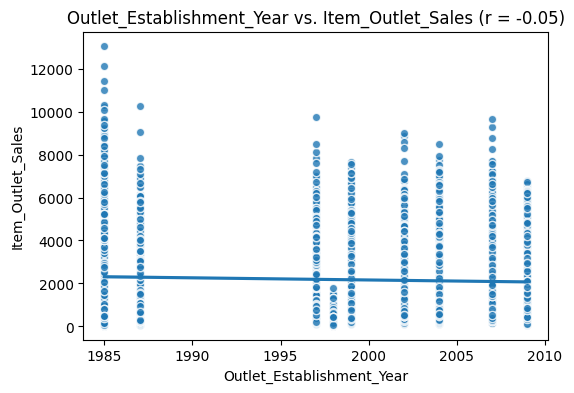

In [ ]:
plot_numeric_vs_target(df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', figsize=(6,4));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`no `
- Does this feature appear to be a predictor of the target?`no , this feature should be dropped   `

### inspecting Outlet_Size

Outlet_Size	The size of the store in terms of ground area covered


#### univariate visualization showing the distribution of values/categories

<ipython-input-35-b402481b9b3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


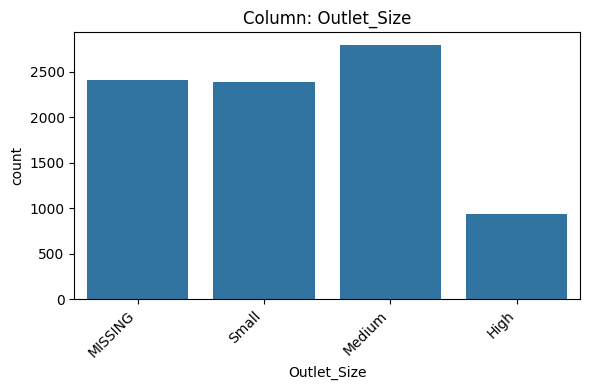

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
category_order = ['MISSING','Small', 'Medium', 'High']
explore_categorical(df,x='Outlet_Size', fillna = True, placeholder = 'MISSING', order = category_order);

- What type of feature is it?  `ordinal`
- How many null values? `2410 ` What percentage? `28.28% ` What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)`we should imput for missing as there is no evidance what this could be and we want to keep as amuch data as possible and we will invistigate the relation more to know what to do `
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 3 values without missing  `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

<ipython-input-35-b402481b9b3a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


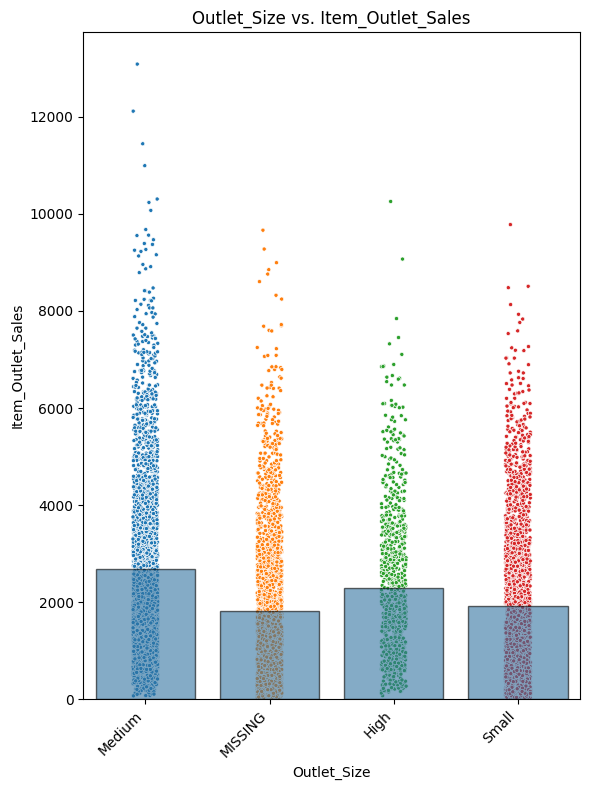

In [ ]:
plot_categorical_vs_target(df, x='Outlet_Size', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store size have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean  `

### inspecting Outlet_Location_Type

Outlet_Location_Type:	The type of area in which the store is located


#### univariate visualization showing the distribution of values/categories

<ipython-input-35-b402481b9b3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


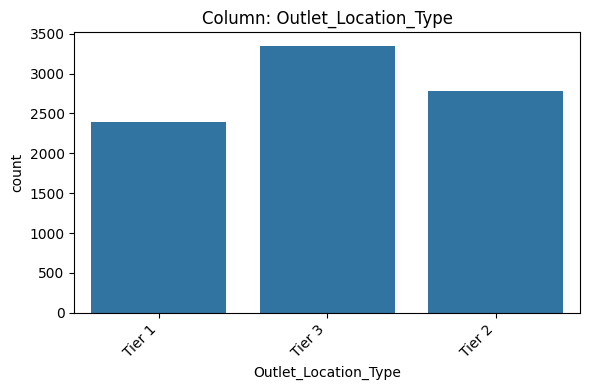

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,x='Outlet_Location_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `ordinal`
- How many null values? `zero`
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 3 values   `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

<ipython-input-35-b402481b9b3a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


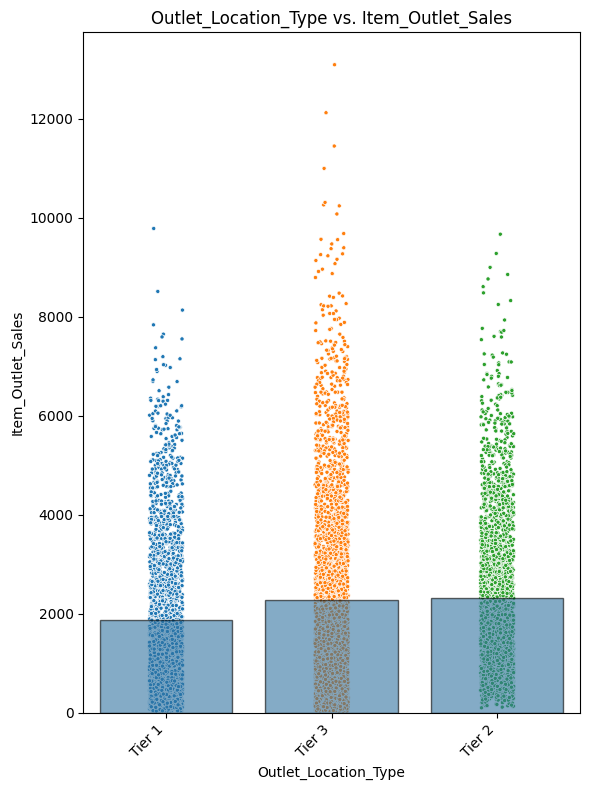

In [ ]:
plot_categorical_vs_target(df, x='Outlet_Location_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store location have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is small but noticable difference between each category mean  `

### inspecting Outlet_Type

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket


#### univariate visualization showing the distribution of values/categories

<ipython-input-35-b402481b9b3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


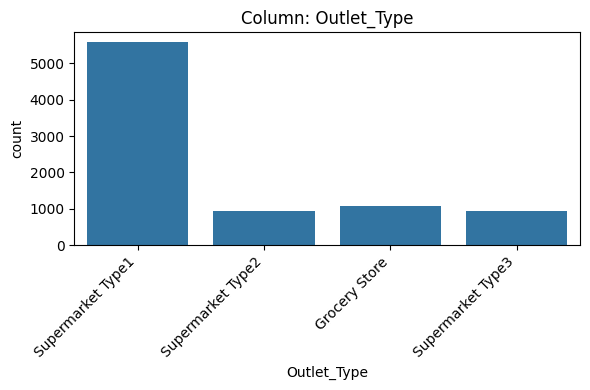

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,x='Outlet_Type', fillna = True, placeholder = 'MISSING');

- What type of feature is it?  `Categorical (nominal),`
- How many null values? `zero`
-Is the feature constant or quasi-constant? `no there is no value represent more than 95% of the data`
-What is the cardinality? Is it high (>10)?
`no only 4 values   `
-Would we know this feature before the target is determined?`yes `
- Is there a business case/understanding reason to exclude based on our business case?`no we think this feature  will be predictor  `


####  multivariate visualization plotting feature vs. the target

<ipython-input-35-b402481b9b3a>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


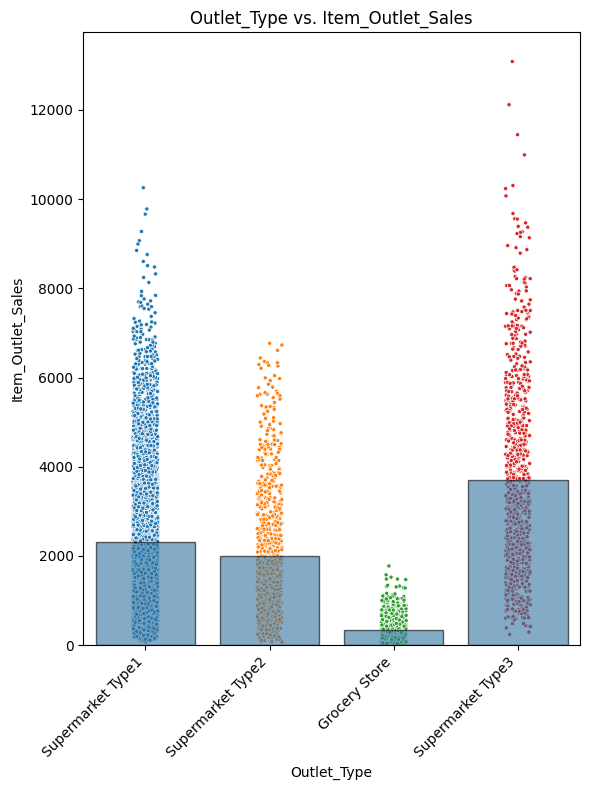

In [ ]:
plot_categorical_vs_target(df, x='Outlet_Type', y='Item_Outlet_Sales', figsize=(6,8));

- Based on your business understanding, would you expect this feature to be a predictor of the target?`yes i think store type have correlation with target  `
- Does this feature appear to be a predictor of the target?`yes there is noticable difference between each category mean  `

# Project 1 - part 5

## Preprocesing for Machine Learning

<p>For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.  </p>
<p>You should load a fresh version of the <a href="https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing" target="_blank">original data set here</a> using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!</p>
<ul>
            <li>Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)</li>
            <li>Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  </li><li>Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.</li>
            <li>Perform a train test split </li>
            <li>Create a preprocessing object to prepare the dataset for Machine Learning</li>
            <li>Make sure your imputation of missing values occurs  <u>after</u> the train test split using SimpleImputer.  <br>
</li>
                </ul>

### Data Load

In [2]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')

In [4]:
# Save the filepath and load the data as "df_sales"

path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_new = pd.read_csv(path)
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### checking missing value  

In [23]:
df_new.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### checking duplicates

In [5]:
df_new.duplicated().sum()

0

### Inspecting Categorical Columns & Addressing Inconsistent Values

In [6]:
data_types = df_new.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [7]:
for col in str_cols:
    print(f'- {col}:')
    print(df_new[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

After further investigation of the categorical columns, there are inconsistencies with spellings of the following categories in the Item_Fat_Content column

LF should be Low Fat

low fat should be Low Fat

reg should be Regular

In [8]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 50)
df_new['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
Item_Fat_Content_map = {'LF':'Low Fat',
                        'low fat':'Low Fat',
                        'reg':'Regular'}

df_new['Item_Fat_Content'] = df_new['Item_Fat_Content'].replace(Item_Fat_Content_map)
df_new['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
df_new.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Train Test Split


In [11]:
df_new['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
# The target we are trying to predict
target = 'Item_Outlet_Sales'
y = df_new[target]
# The features we will use to make the prediction
X = df_new.drop(columns=[target , 'Item_Identifier'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


### Making a Preprocessing Pipeline

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


#### For the numeric features pipeline:


In [26]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

#### For the ordinal pipeline:


In [27]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
print("Ordinal Columns:", ord_cols)

ord_imputer = SimpleImputer(strategy='most_frequent')

# Specifying order of categories for our  Ordinal Qual/Cond Columms
Fat_cond_order = ['Low Fat','Regular']
Size_cond_order = ['Small','Medium', 'High']
Type_cond_order = ['Tier 1','Tier 2', 'Tier 3' ]
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Fat_cond_order, Size_cond_order,
                           Type_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_imputer, ord_encoder, scaler_ord)
ord_pipe


Ordinal Columns: ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

#### For categorical (nominal) pipeline:

In [28]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Create a Column Transformer


In [29]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

In [30]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [31]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  Ord...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
#X_train_processed = col_transformer.transform(X_train)
#X_test_processed = col_transformer.transform(X_test)